<a href="https://colab.research.google.com/github/rowaishanna/DS-Unit-1-Sprint-2-Statistics/blob/master/Rowais_Hanna_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
#imports:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy.stats import chisquare
from scipy.stats import normaltest
from scipy.stats import stats
from scipy.stats import t, ttest_1samp

In [0]:
#get the data:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data


--2020-02-01 05:10:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-02-01 05:10:13 (129 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:
# Define column names and data frame, and deal with ?s:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values="?")

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


# Confidence Interval


In [0]:
# changing Y and N to 1 and 0 repsectively to deal with numerics instead of string.
df = df.replace({'y':1, 'n':0})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# specify dems and reps as their own dataframes:
rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [0]:
len(dem['budget'])

267

In [0]:
dem['budget'].mean()

0.8884615384615384

In [0]:
# Let's look at the Confidence Interval of how democrats voted on the "budget" bill.
# to do this, I'll use scipy's built in CI function: t.interval
# the function t.interval requires the following inputs:

# Sample Size
n = len(dem['budget'])
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = dem['budget'].mean()
# Sample Standard Deviation
sample_std = np.std(dem['budget'])
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("Democratic Vote on Budget Bill 95% Confidence Interval: ", CI)



Democratic Vote on Budget Bill 95% Confidence Interval:  (0.8505296387732322, 0.9263934381498447)


In [0]:
# this allows us to say with 95% confidence that the results of the democrats'
#vote on this bill are between 0.85 and 0.926 



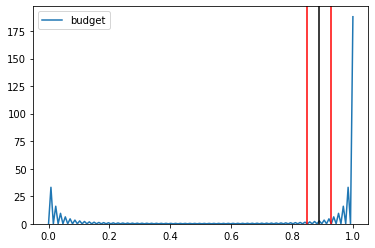

In [0]:
# now to plot it:
import matplotlib.pyplot as plt

sns.kdeplot(dem['budget'].dropna());
CI
plt.axvline(x=CI[0], color='red');
plt.axvline(x=mean, color = 'k');
plt.axvline(x=CI[1], color= 'red');

# Chi square tests

In [0]:
# now onto chi-square test.  First, I'll re-read in a dataset with categorical 
# values

df2 = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df2.head()

(435, 17)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# now to see what the data looks like:

df2.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
# the above is only showing me the numeric columns. Let's look at the categorical:

df2.describe(exclude = 'number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


***One might examine the possibility of there being a relationship between the population's race, and their marital status. Let's examine this.***

In [0]:
# let's say I wanted to look at marital status and race to see if there's a 
# statistically significant relationship between those 2 variables.
# first, I'll examine the data in those columns to ensure I don't have data issues:
# Missing values?

df2.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

***Let's isolate out the data of the variables in consideration: marital status versus race, creating a new dataframe***

In [0]:
#there are some but not in the 2 columns I'm concerned about, so for this exercise
# I can proceed without worrying about that.
# now I'll create a crosstab of the 2 sets of data:

crosstab = pd.crosstab(df2['marital-status'],df2['race'], margins=True)
crosstab

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
marital-status,,,,,,
Divorced,60,75,485,26,3797,4443
Married-AF-spouse,0,0,1,0,22,23
Married-civ-spouse,116,508,837,105,13410,14976
Married-spouse-absent,9,41,62,15,291,418
Never-married,103,372,1346,105,8757,10683
Separated,11,19,265,13,717,1025
Widowed,12,24,128,7,822,993
All,311,1039,3124,271,27816,32561


***Looking at just the tabulated numbers of those two variables, it looks like there is indeed a relationship between marital status and race.  The question then is: is it a statistically viable relationship, or just random chance?*** 

In [0]:
# first I'll calculate chi-squared by hand using numpy. creating counts:

row_sums = crosstab.iloc[0:7, 5].values
col_sums = crosstab.iloc[7, 0:5].values

print(row_sums)
print(col_sums)

[ 4443    23 14976   418 10683  1025   993]
[  311  1039  3124   271 27816]


In [0]:
#then I'll make a dataframe for the totals:

total = crosstab.loc['All','All']
total

32561

In [0]:
# now let's calculate the expected values manually because we're cavemen and are
# unaware of chi-squared from scipy 

expected= []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(7, 5)
[[4.24364424e+01 1.41773195e+02 4.26274746e+02 3.69783790e+01
  3.79553724e+03]
 [2.19679985e-01 7.33914806e-01 2.20668898e+00 1.91425325e-01
  1.96482909e+01]
 [1.43040324e+02 4.77874267e+02 1.43684236e+03 1.24642855e+02
  1.27936002e+04]
 [3.99244495e+00 1.33381039e+01 4.01041737e+01 3.47894721e+00
  3.57086330e+02]
 [1.02036578e+02 3.40887473e+02 1.02495906e+03 8.89129019e+01
  9.12620399e+03]
 [9.79008630e+00 3.27070729e+01 9.83415743e+01 8.53091121e+00
  8.75630355e+02]
 [9.48444458e+00 3.16859740e+01 9.52713983e+01 8.26458033e+00
  8.48293603e+02]]


In [0]:
#now let's make a table of just values of the crosstab above and call it observed:

observed = pd.crosstab(df2['marital-status'],df2['race']).values
print(observed.shape)
observed

(7, 5)


array([[   60,    75,   485,    26,  3797],
       [    0,     0,     1,     0,    22],
       [  116,   508,   837,   105, 13410],
       [    9,    41,    62,    15,   291],
       [  103,   372,  1346,   105,  8757],
       [   11,    19,   265,    13,   717],
       [   12,    24,   128,     7,   822]])

In [0]:
# now that we have the observed values, will manually calculate chi^2 like a caveman:

chi_squared = ((observed - expected)**2 / (expected)).sum()
print(f"chi-squared: {chi_squared}")

chi-squared: 923.8086971524608


In [0]:
# now calculate degrees of freedom, again manually like a caveman:

degrees_of_freedom =(len(row_sums)-1)*(len(col_sums)-1)
print(f"degrees of freedom: {degrees_of_freedom}")

degrees of freedom: 24


In [0]:
# now using Scipy:
import scipy.stats as stats
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {degrees_of_freedom}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 923.8086971524608
P-value: 1.3087338193819433e-179
Degrees of Freedom: 24
Expected: 
 [[4.24364424e+01 1.41773195e+02 4.26274746e+02 3.69783790e+01
  3.79553724e+03]
 [2.19679985e-01 7.33914806e-01 2.20668898e+00 1.91425325e-01
  1.96482909e+01]
 [1.43040324e+02 4.77874267e+02 1.43684236e+03 1.24642855e+02
  1.27936002e+04]
 [3.99244495e+00 1.33381039e+01 4.01041737e+01 3.47894721e+00
  3.57086330e+02]
 [1.02036578e+02 3.40887473e+02 1.02495906e+03 8.89129019e+01
  9.12620399e+03]
 [9.79008630e+00 3.27070729e+01 9.83415743e+01 8.53091121e+00
  8.75630355e+02]
 [9.48444458e+00 3.16859740e+01 9.52713983e+01 8.26458033e+00
  8.48293603e+02]]


***In this case the null hypothesis, that is, the relationship between marital status and race does not exist and that those variables are independent, is REJECTED as the p-value is practically 0.  It is fair to conclude that there indeed is an association between race and marital status.***

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)